# Regression model for House Sales in King County, USA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Loading the data set

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.shape

(21613, 21)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Data wrangling

## Droping columns

In [8]:
df.drop(['id','date','zipcode'],axis=1,inplace=True)

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## Correcting data type

In [10]:
df[['bathrooms','floors']]=df[['bathrooms','floors']].astype('int')

In [11]:
df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]=df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].astype('float64')

In [12]:
df.dtypes

price            float64
bedrooms           int64
bathrooms          int32
sqft_living      float64
sqft_lot         float64
floors             int32
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

## Checking for missing values

In [13]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Droping duplicates

In [14]:
df=df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

# Exploratory data analysis

In [16]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.400984e+05,3.370927,1.749722,2079.958950,1.510962e+04,1.446039,0.007544,0.234219,3.409478,7.656655,1788.414846,291.544104,1970.999907,84.330155,47.560050,-122.213894,1986.583164,12770.108340
std,3.671646e+05,0.930103,0.734933,918.505805,4.142491e+04,0.551805,0.086527,0.766169,0.650782,1.175484,828.141155,442.612560,29.371463,401.517026,0.138578,0.140830,685.421474,27307.006892
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.000000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.620000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
df['waterfront'].value_counts()

0    21445
1      163
Name: waterfront, dtype: int64

In [18]:
df['view'].value_counts()

0    19485
2      963
3      509
1      332
4      319
Name: view, dtype: int64

In [19]:
df['condition'].value_counts()

3    14027
4     5678
5     1701
2      172
1       30
Name: condition, dtype: int64

In [20]:
df['grade'].value_counts()

7     8981
8     6066
9     2612
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

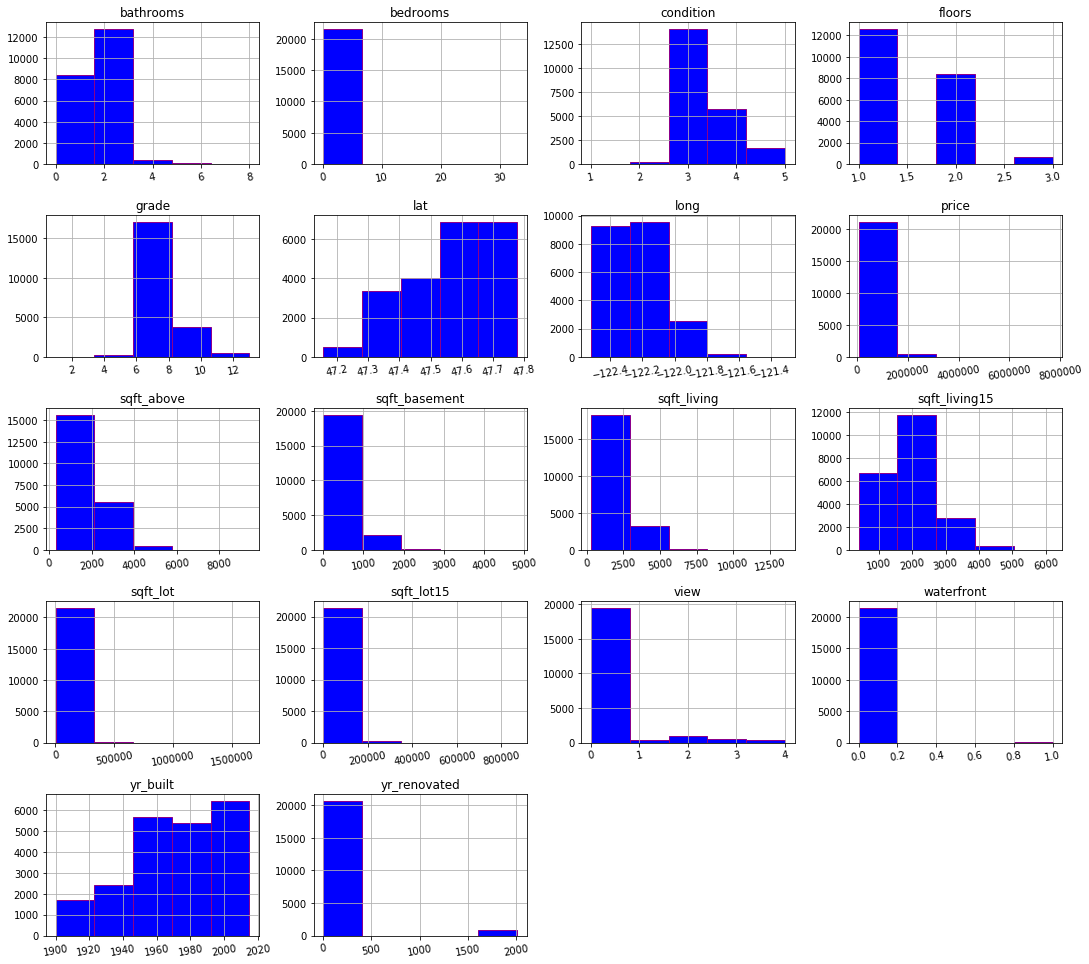

In [21]:
fig=df.hist(bins=5,color='blue',edgecolor='darkmagenta',linewidth=1.0,xlabelsize=10,ylabelsize=10,xrot=10,yrot=0,figsize=(10,9),grid=True)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

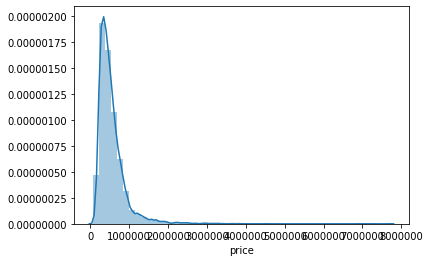

In [22]:
sns.distplot(df['price'])

we can see the majority of the price is less than 1,000,000. but we can see we have outliers in the price dataset

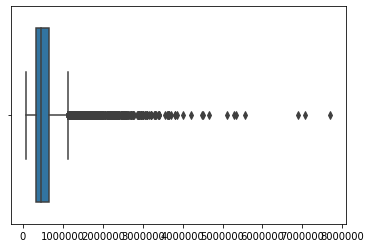

In [23]:
sns.boxplot(df[['price']])

This box plot shows as that we have outliers

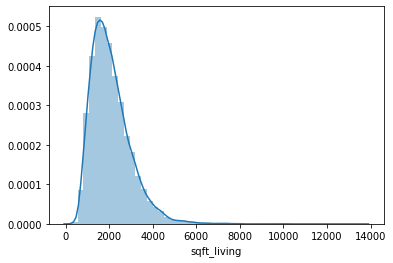

In [24]:
sns.distplot(df['sqft_living'])

The column dataset sqft_living is normaly distributed.majority of the houses have sqft_living between 1000 and 4000.we also have outliers in the dataset

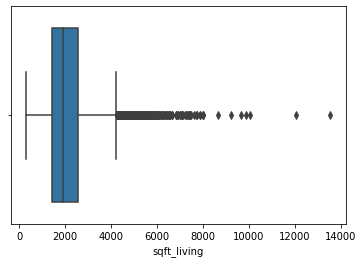

In [25]:
sns.boxplot(df['sqft_living'])

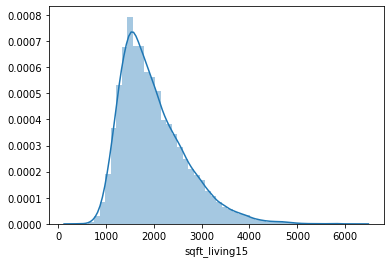

In [26]:
sns.distplot(df['sqft_living15'])

Here we can see  sqft_linving1 of the houses of the nearest 15 neighbors is between 1000 and 3000. we also have some outliers here

AxesSubplot(0.125,0.125;0.775x0.755)


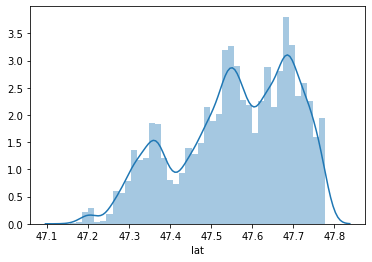

In [27]:
print(sns.distplot(df['lat']))


AxesSubplot(0.125,0.125;0.775x0.755)


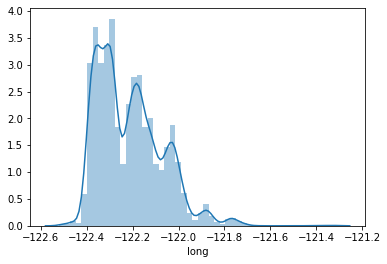

In [28]:
print(sns.distplot(df['long']))

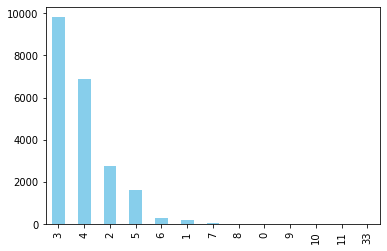

In [29]:
df['bedrooms'].value_counts().plot.bar(color='skyblue')

The majority of the houses have bedroom number 3 and 4.There are also houses which have 2,5,6 bedrooms. There is also outlier in the dataset as we see some of the houses have 7 bedrooms

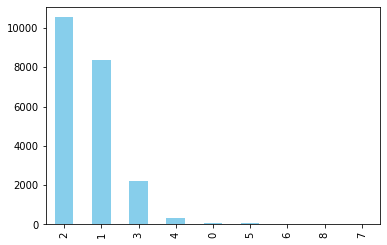

In [30]:
df['bathrooms'].value_counts().plot.bar(color='skyblue')

The majority of the houses have 2 or 1 bathrooms, There is outlier in the dataset with 0 bathroom, 5,6,8,7 bathrooms

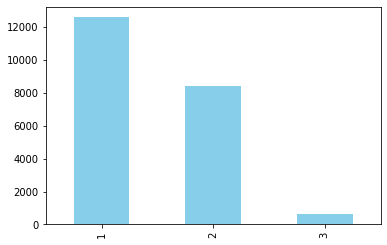

In [31]:
df['floors'].value_counts().plot.bar(color='skyblue')

The majority houses have 1 or 2 floors.Some of the houses have 3 floors

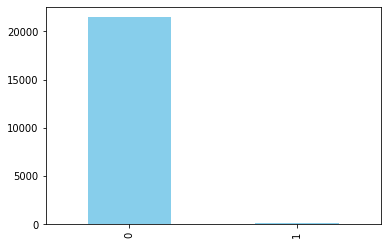

In [32]:
df['waterfront'].value_counts().plot.bar(color='skyblue')

Many houses do not have waterview,some of the houses have waterview

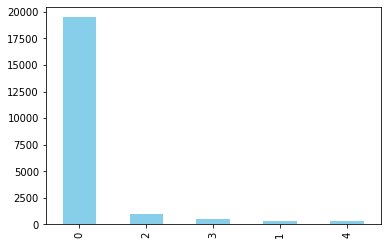

In [33]:
df['view'].value_counts().plot.bar(color='skyblue')

This is the grdaing the how good the view of the house is. 0 being the low score and 4 the highest score. As we can see the majority of the houses do not have good view and some of the houses have great view

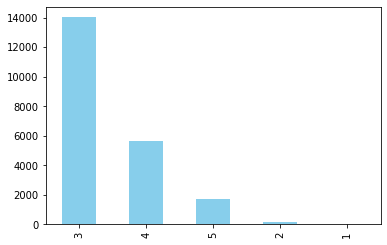

In [34]:
df['condition'].value_counts().plot.bar(color='skyblue')

The variable condition indicates the condition of the house 1-poor,2-fair,3-Average,4-good,5-Verygood
The majority of the houses have value of 3 or 4, small number of houses have a value of 1

AxesSubplot(0.125,0.125;0.775x0.755)


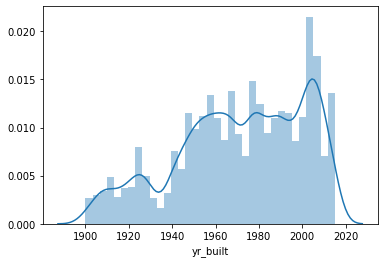

In [35]:

print(sns.distplot(df['yr_built']))

## Bivariate Analysis

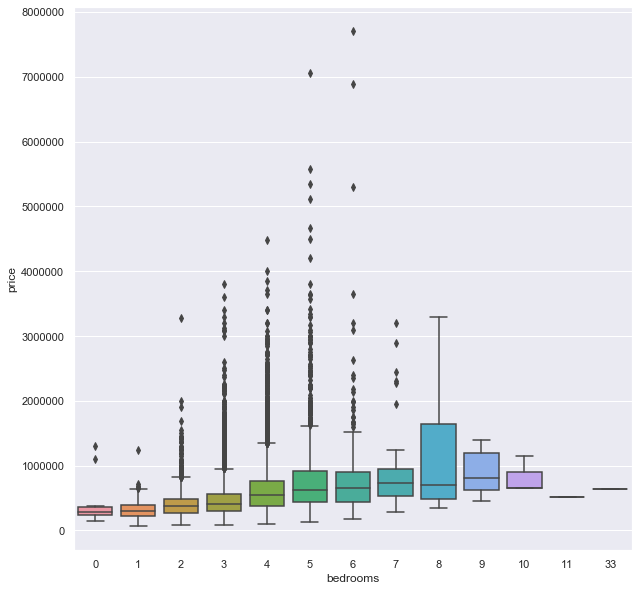

In [36]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x='bedrooms',y='price',data=df)

We can clearly see that as the number of bedrooms increase there is increase in price. we can also see there are outliers

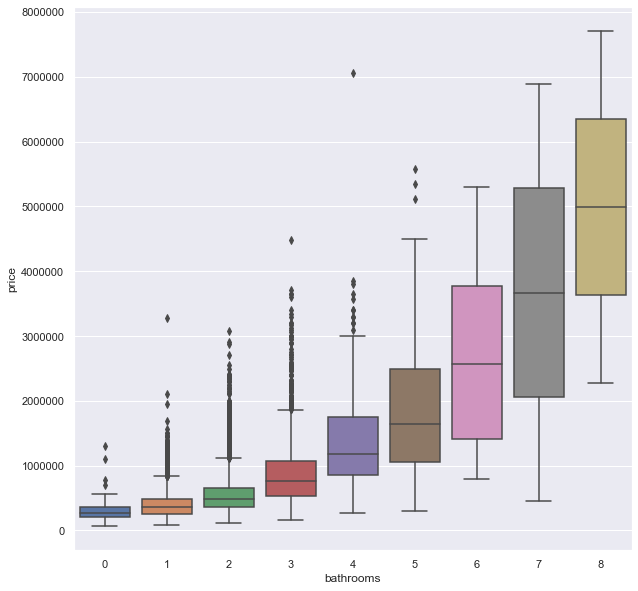

In [37]:
sns.boxplot(x='bathrooms',y='price',data=df)

we can see as the number of bathroom increases the price of the house also increases

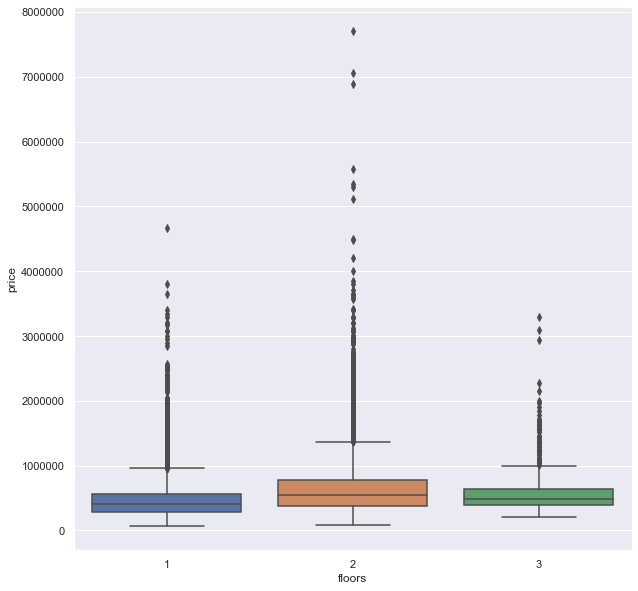

In [38]:
sns.boxplot(x='floors',y='price',data=df)

Houses with 2 floors have higher price than houses with 1 or 3


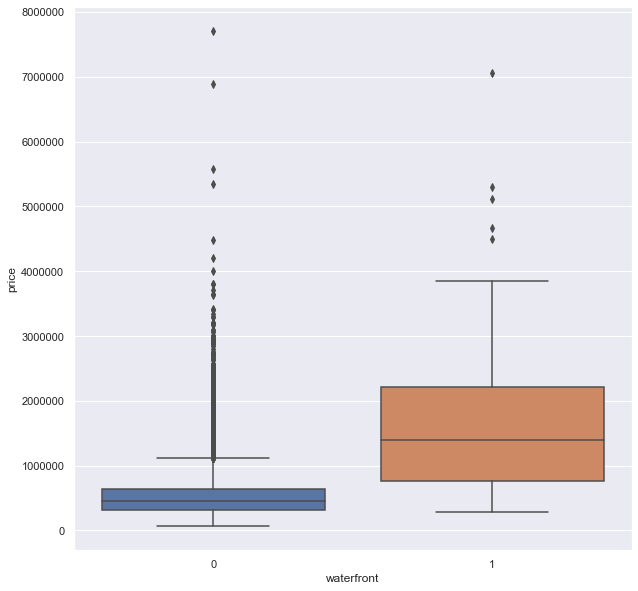

In [39]:
sns.boxplot(x='waterfront',y='price',data=df)

 we can see houses with waterview has higher price than houses without waterview

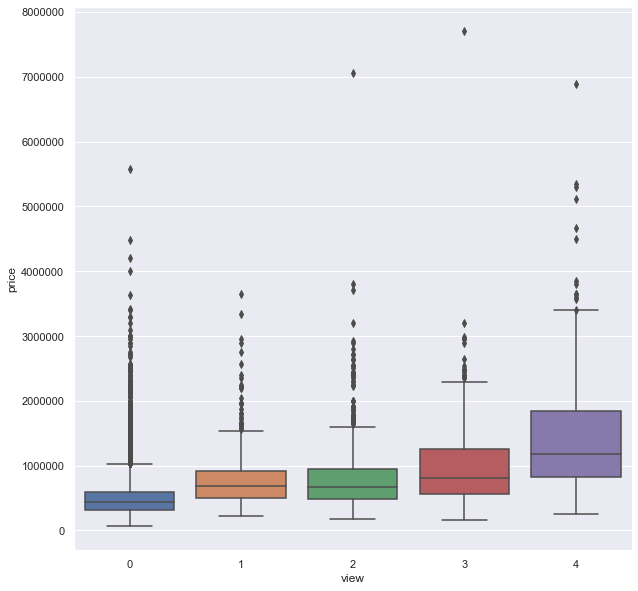

In [40]:
sns.boxplot(x='view',y='price',data=df)

we can see as the value of the grade of view increases the price of the houses also increase.

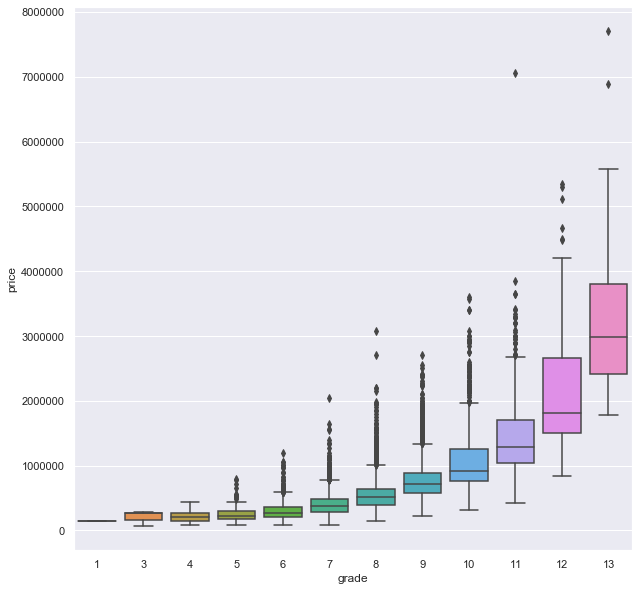

In [41]:
sns.boxplot(x='grade',y='price',data=df)

As the grade of the house increase the price of the houses increase

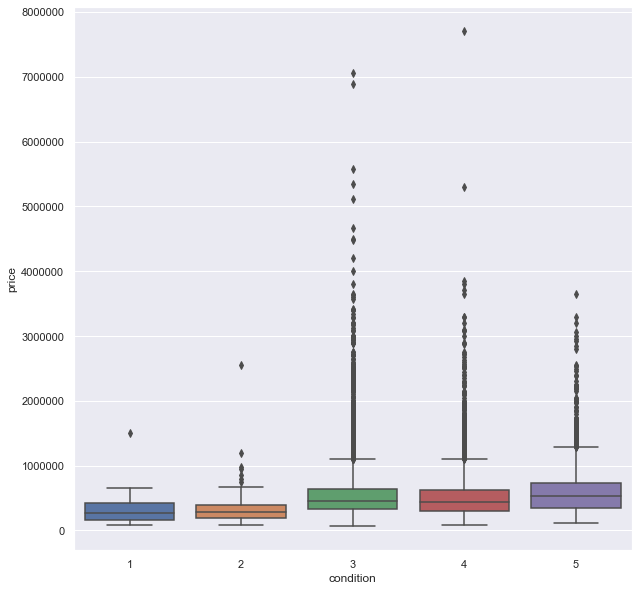

In [42]:
sns.boxplot(x='condition',y='price',data=df)

we can see there is not much difference in price of houses between diferent condition of houses.

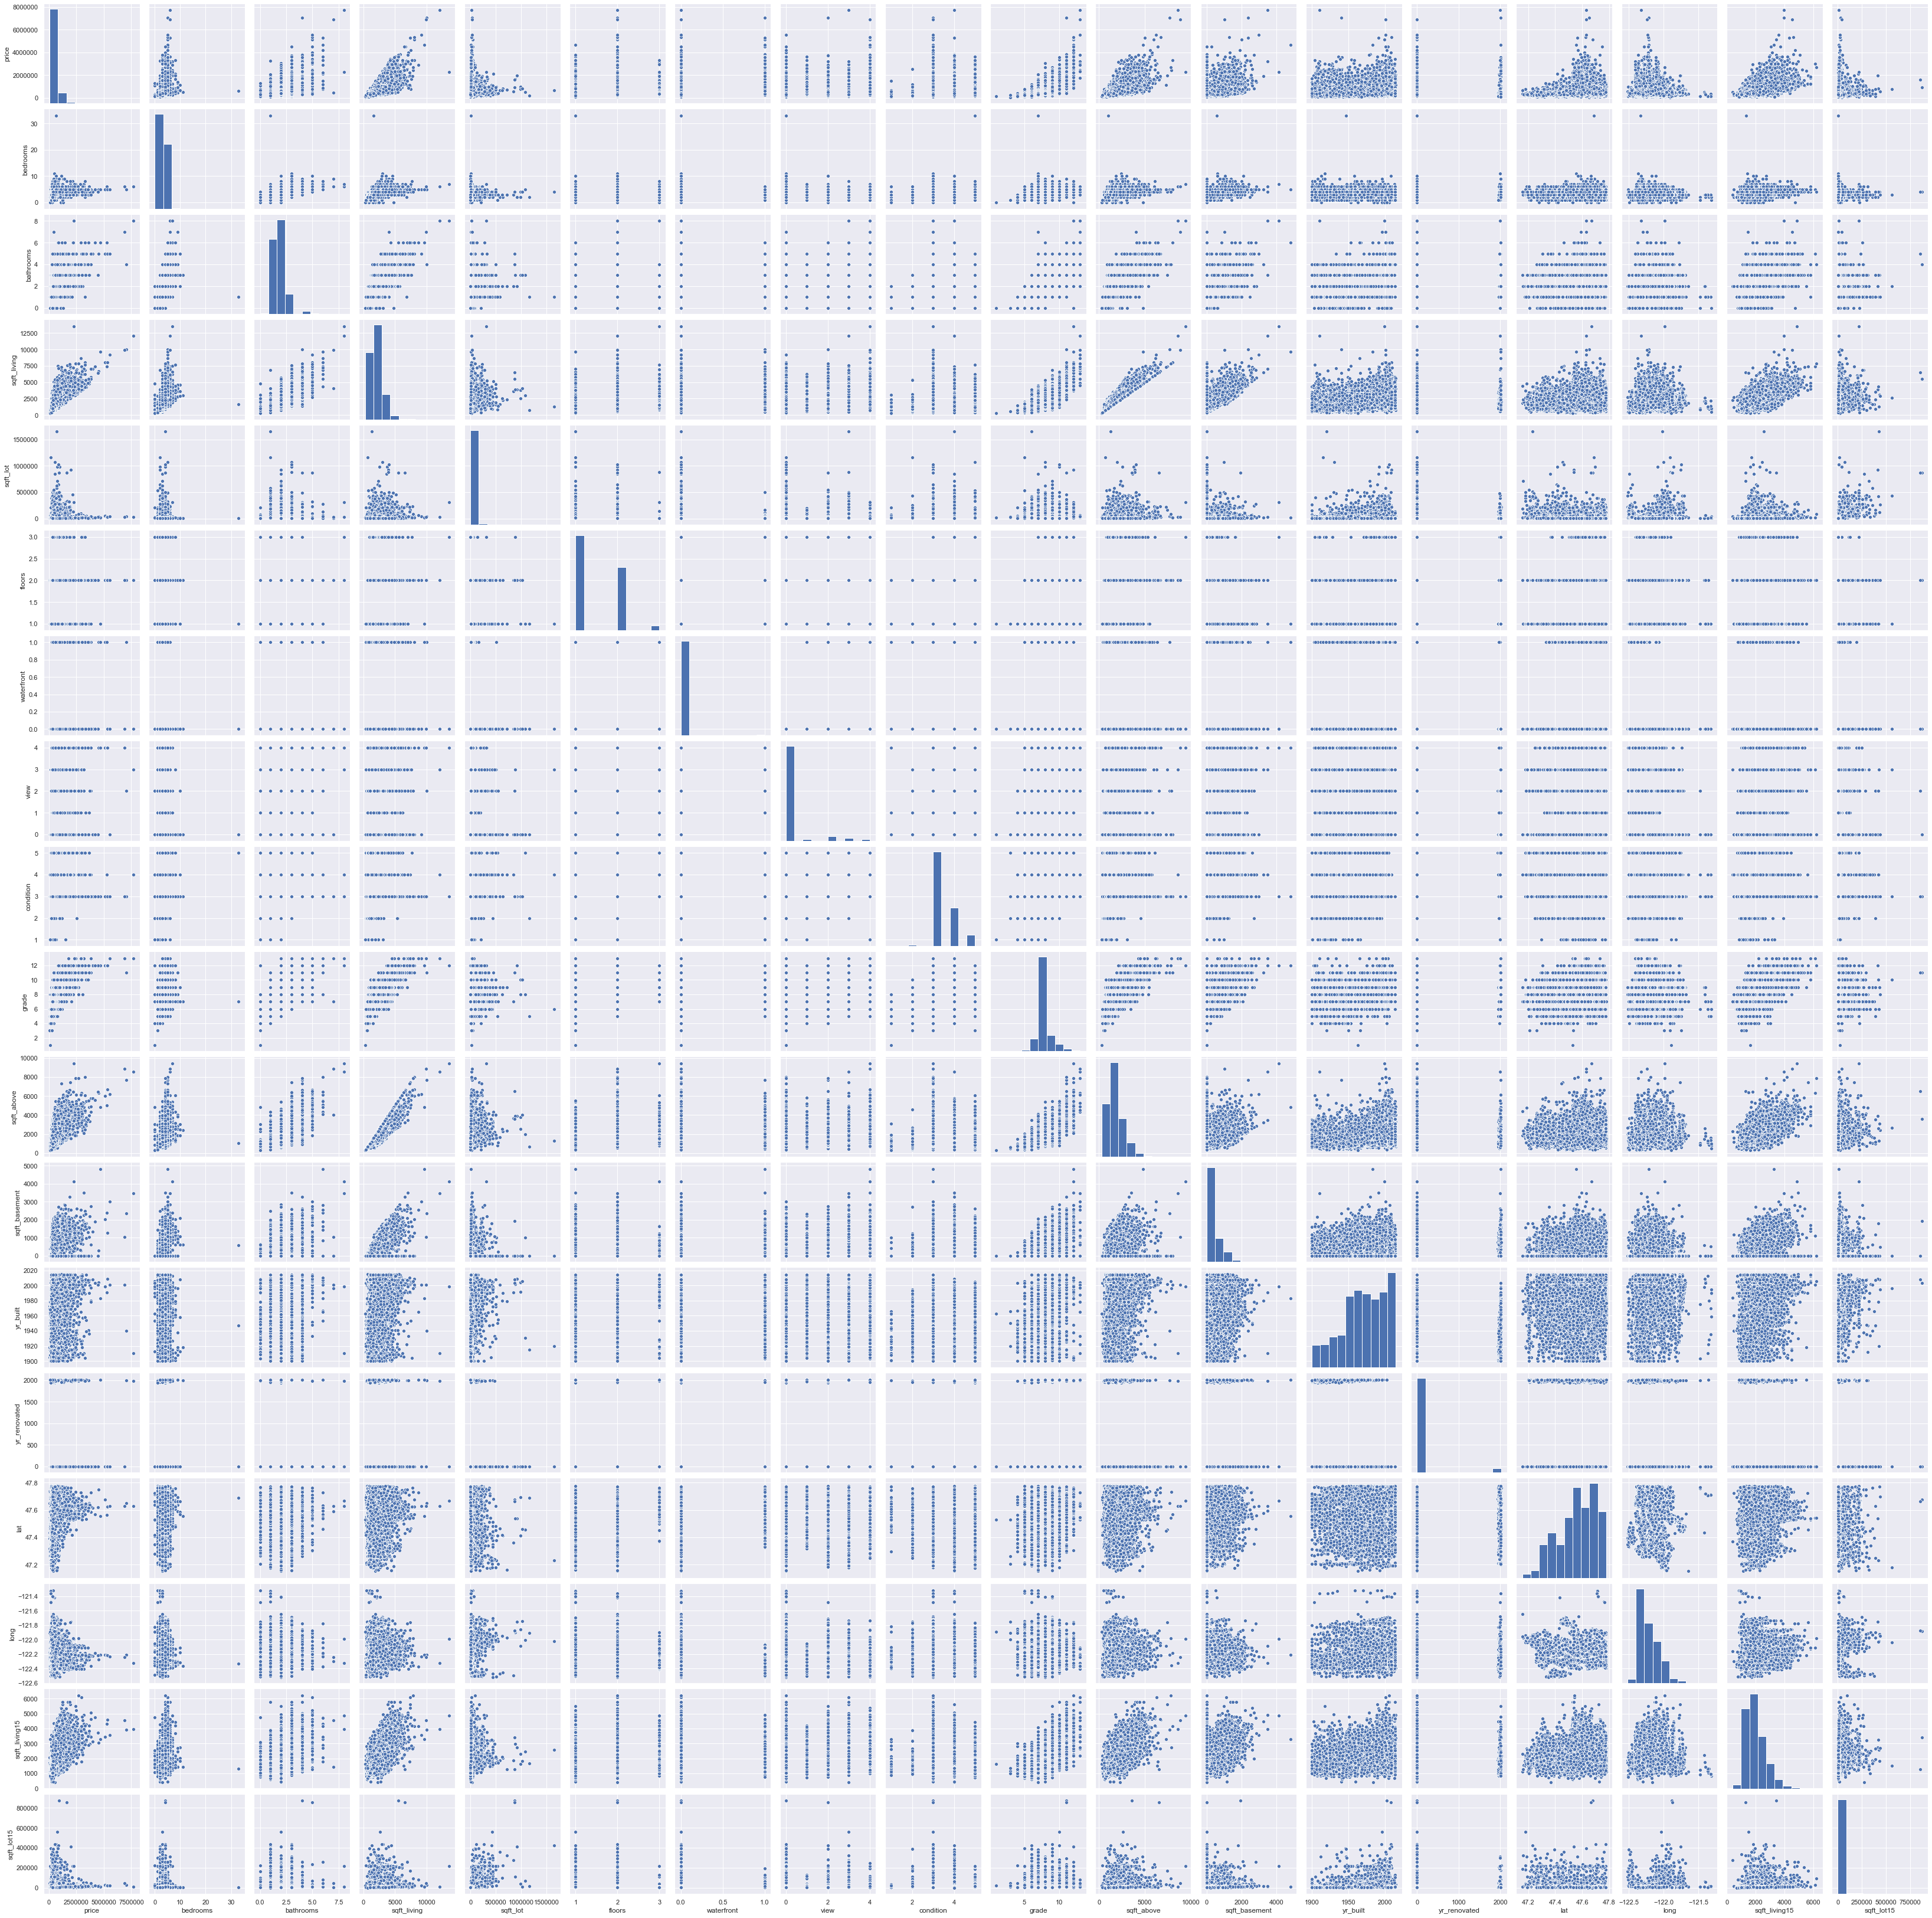

In [43]:
sns.pairplot(df)

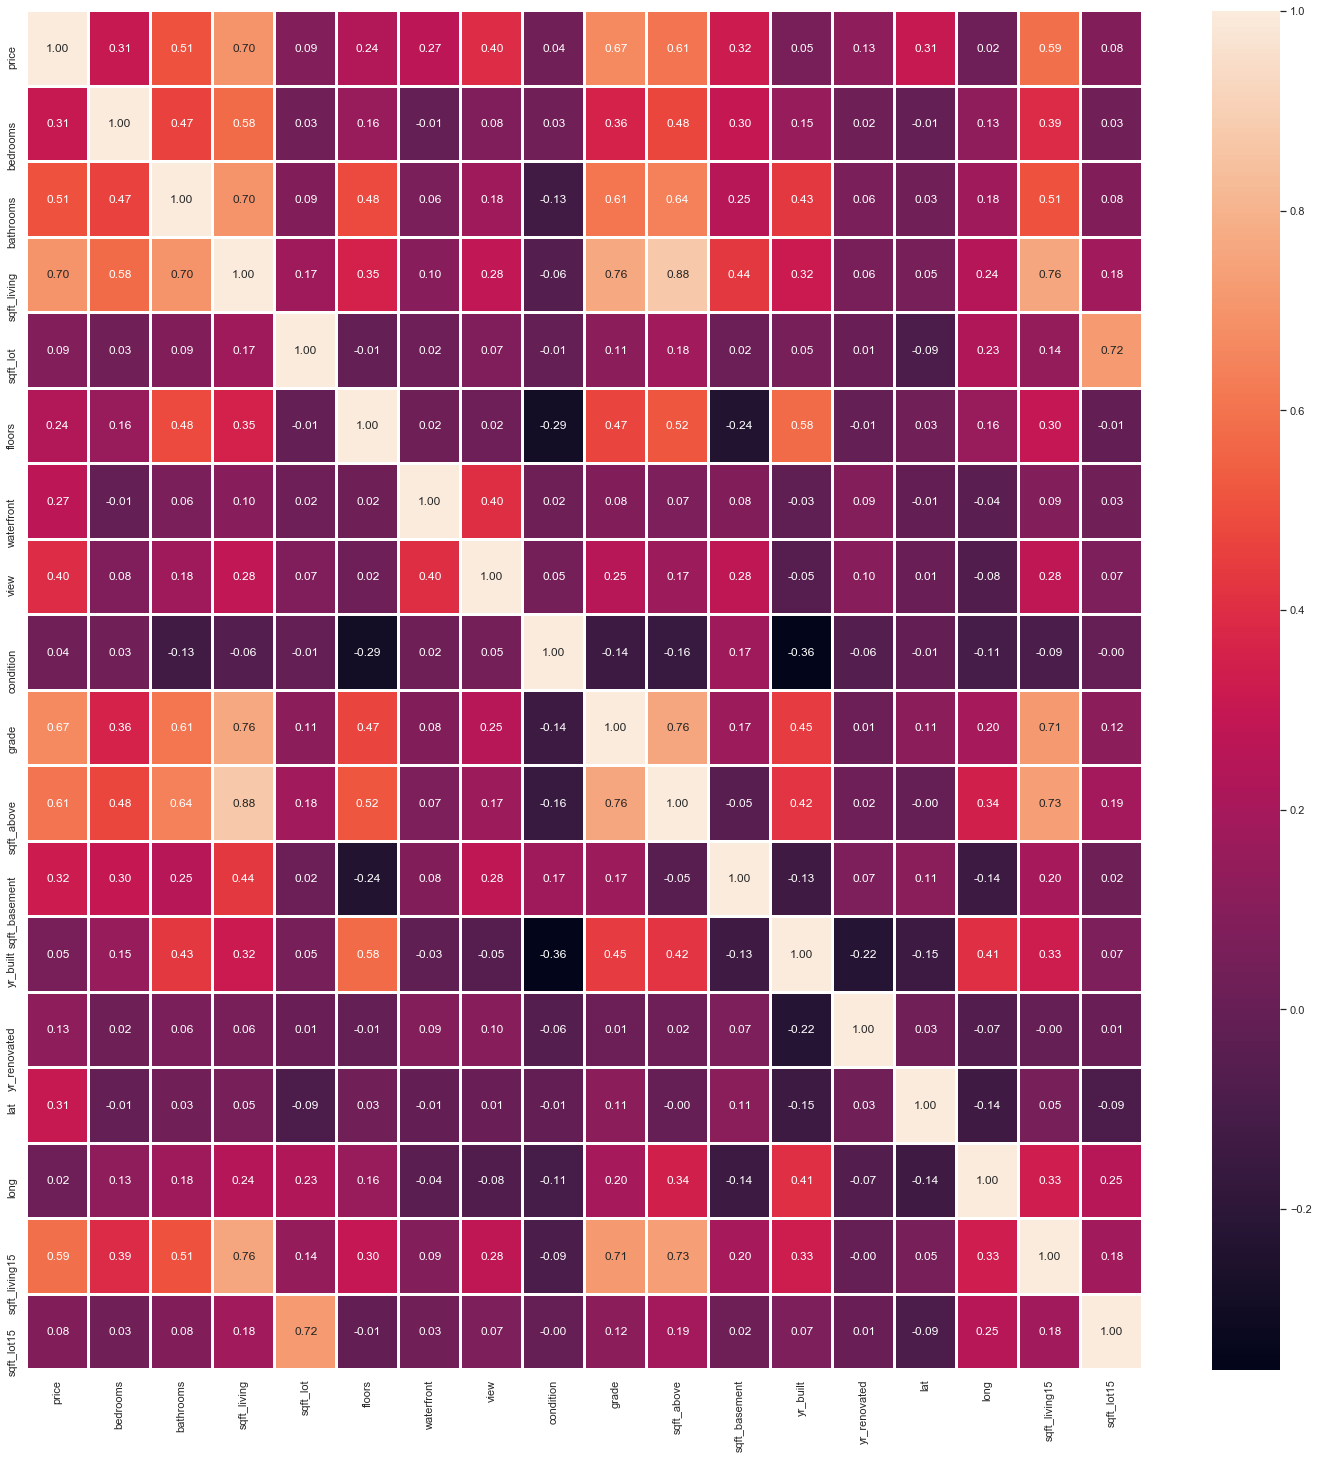

In [44]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=2)

we can see from the heatmap that:-
 sqft_living,lat,sqft_basment,sqft_above,grade,view,waterfront,floors,sqft_living15,bathrooms,bedrooms have moderate and high corelation with price. where as:
  sqft_lot15,sqft_lot,yr built,yr_renovated,condtion,long have very weak corelation
  
 

### Feature selection

In [45]:
df.drop(['sqft_lot','sqft_lot15','yr_built','yr_renovated','condition'],axis=1,inplace=True)

In [46]:
df.drop(['long'],axis=1,inplace=True)

In [47]:
df.drop(['waterfront'],axis=1,inplace=True)

In [48]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1,1180.0,1,0,7,1180.0,0.0,47.5112,1340.0
1,538000.0,3,2,2570.0,2,0,7,2170.0,400.0,47.7210,1690.0
2,180000.0,2,1,770.0,1,0,6,770.0,0.0,47.7379,2720.0
3,604000.0,4,3,1960.0,1,0,7,1050.0,910.0,47.5208,1360.0
4,510000.0,3,2,1680.0,1,0,8,1680.0,0.0,47.6168,1800.0


# Removing outlier

In [49]:
from scipy import stats
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [50]:
new_df

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1,1180.0,1,0,7,1180.0,0.0,47.5112,1340.0
1,538000.0,3,2,2570.0,2,0,7,2170.0,400.0,47.7210,1690.0
2,180000.0,2,1,770.0,1,0,6,770.0,0.0,47.7379,2720.0
3,604000.0,4,3,1960.0,1,0,7,1050.0,910.0,47.5208,1360.0
4,510000.0,3,2,1680.0,1,0,8,1680.0,0.0,47.6168,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530.0,3,0,8,1530.0,0.0,47.6993,1530.0
21609,400000.0,4,2,2310.0,2,0,8,2310.0,0.0,47.5107,1830.0
21610,402101.0,2,0,1020.0,2,0,7,1020.0,0.0,47.5944,1020.0
21611,400000.0,3,2,1600.0,2,0,8,1600.0,0.0,47.5345,1410.0


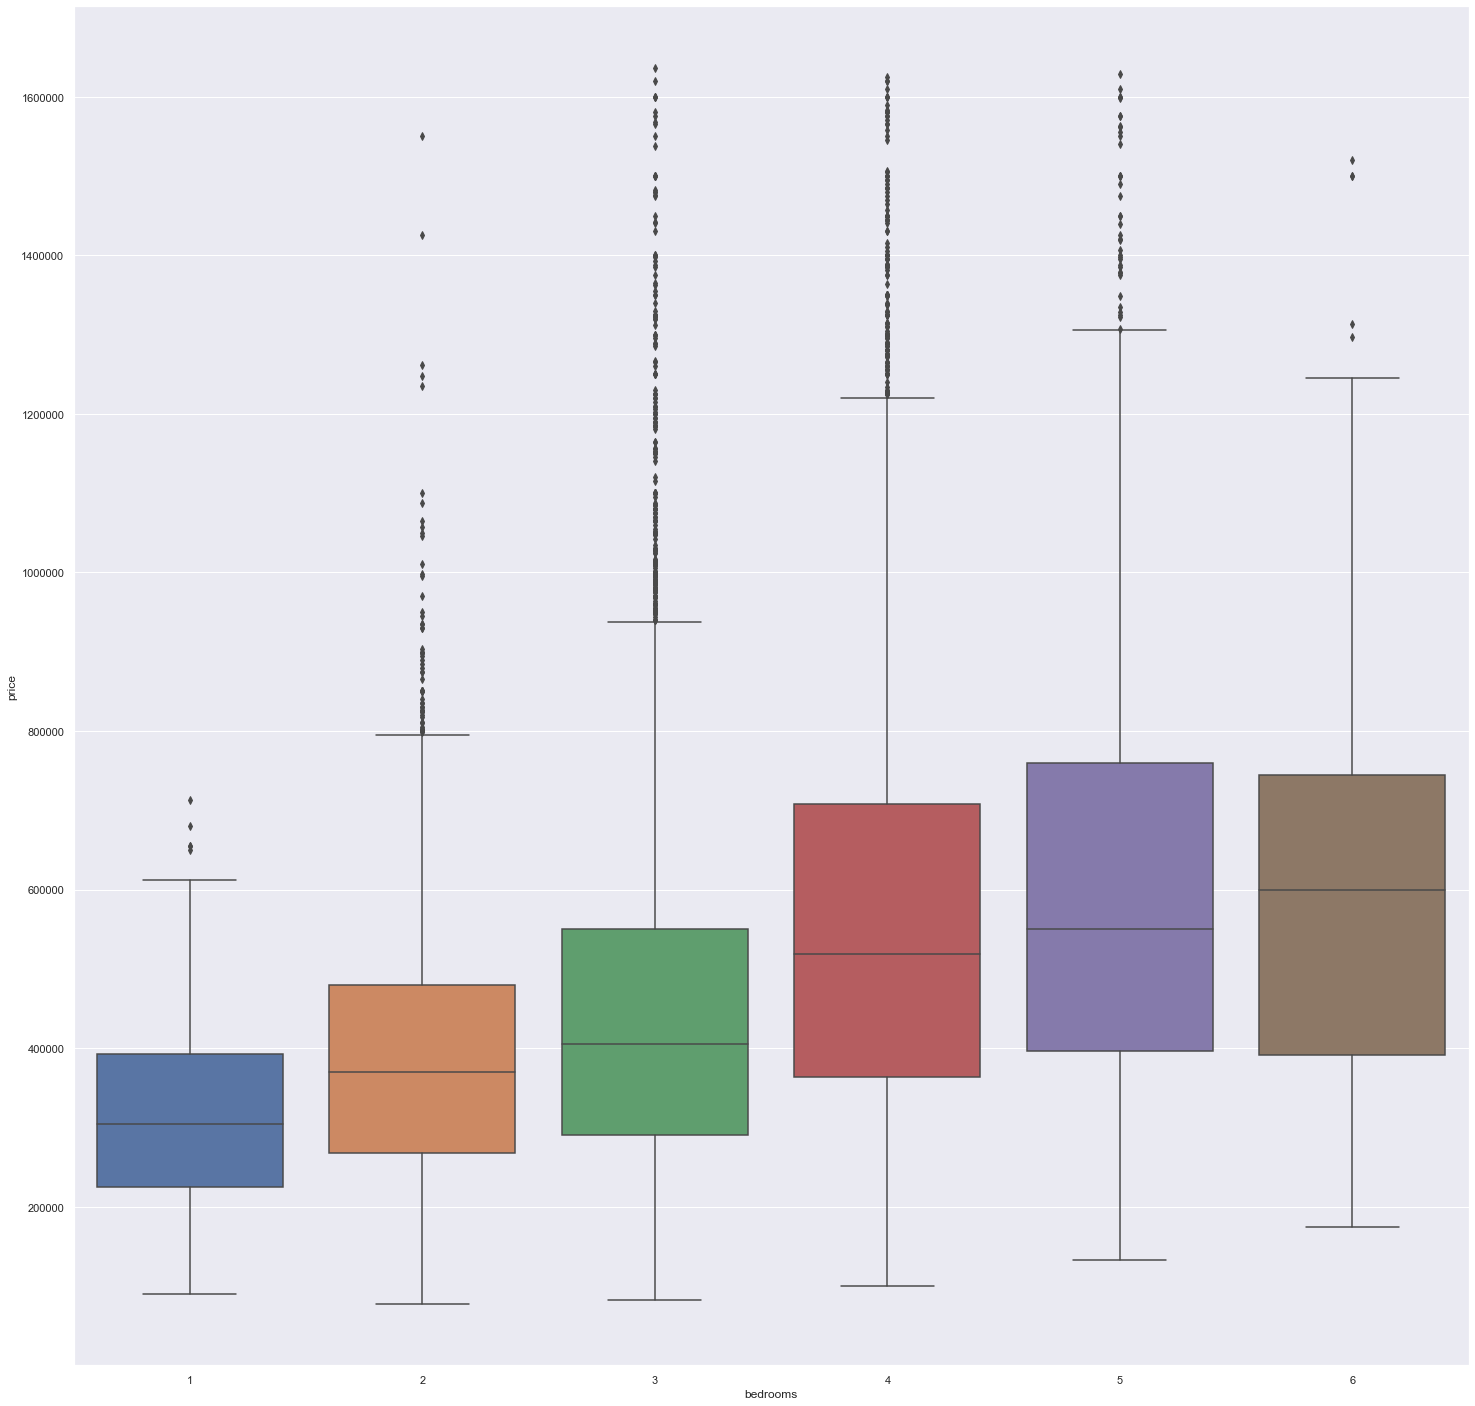

In [51]:
sns.boxplot(x='bedrooms',y='price',data=new_df)

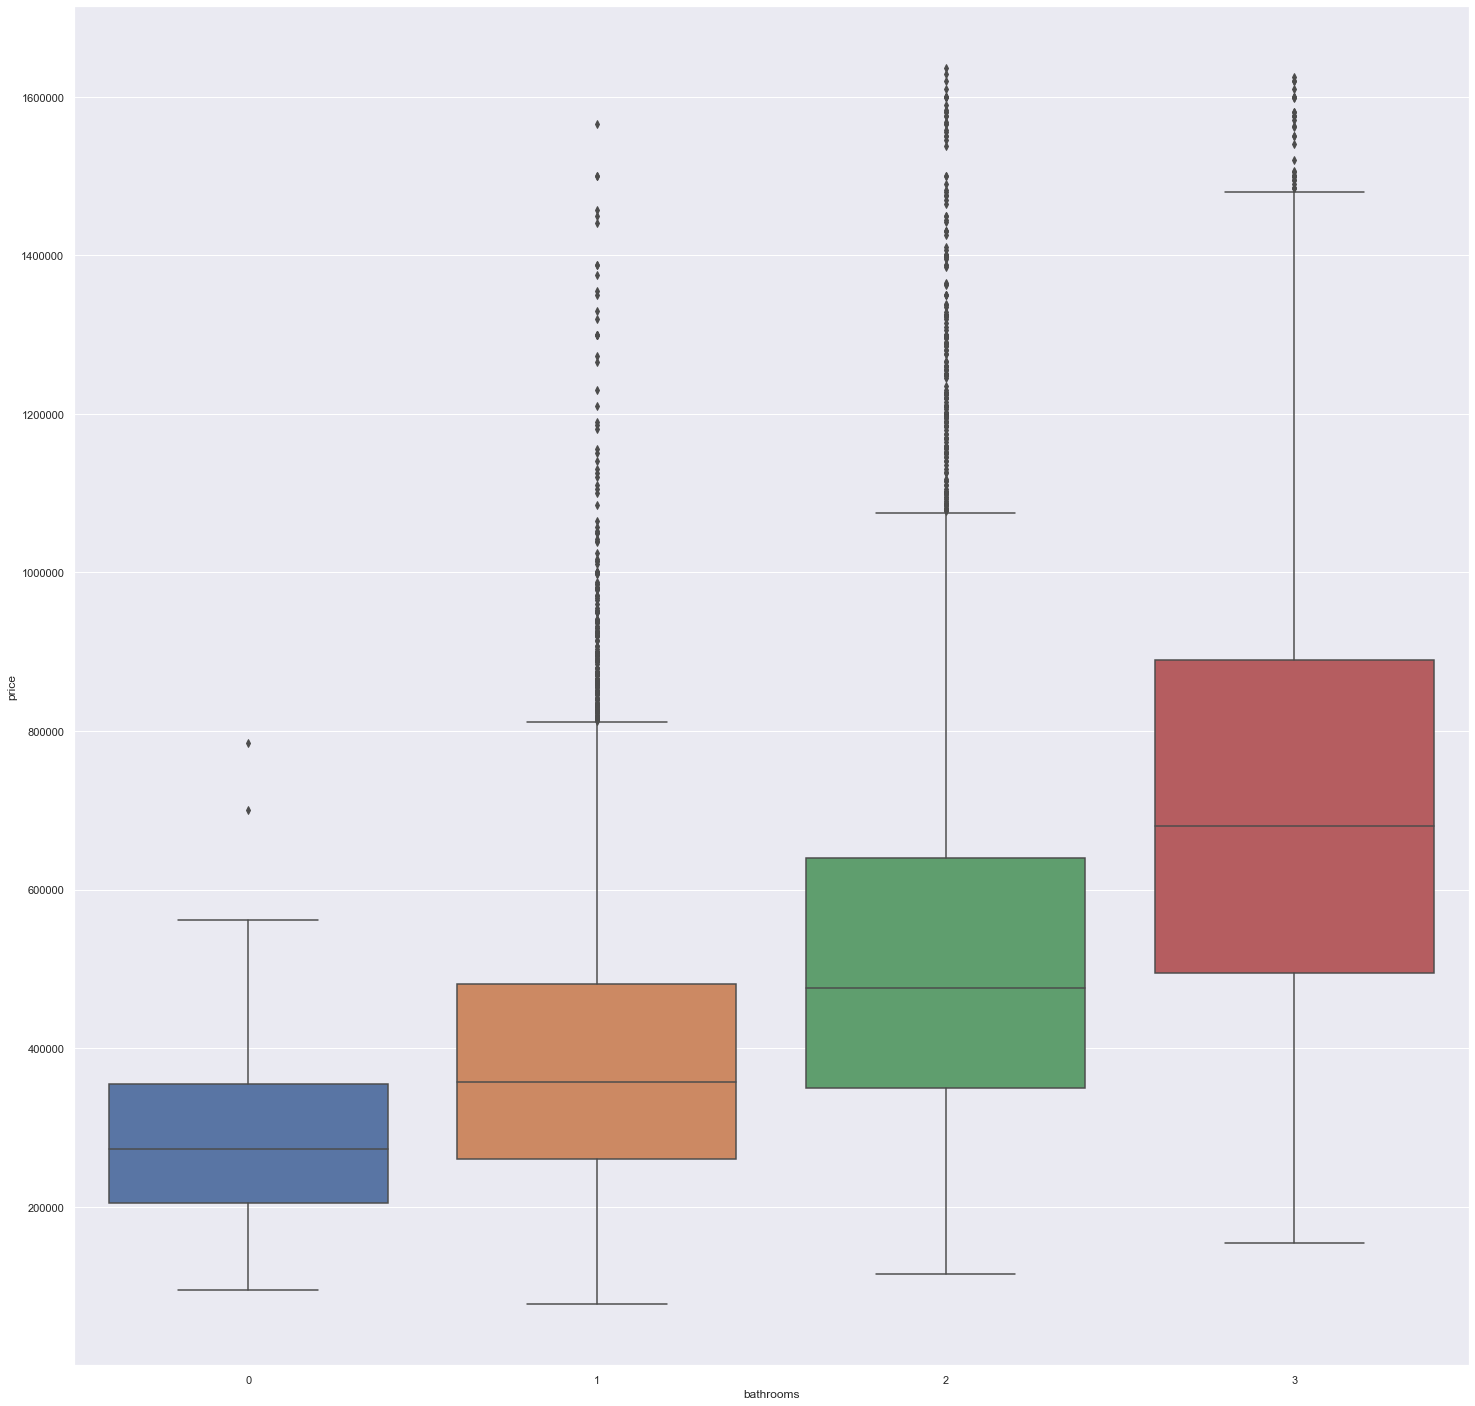

In [52]:
sns.boxplot(x='bathrooms',y='price',data=new_df)

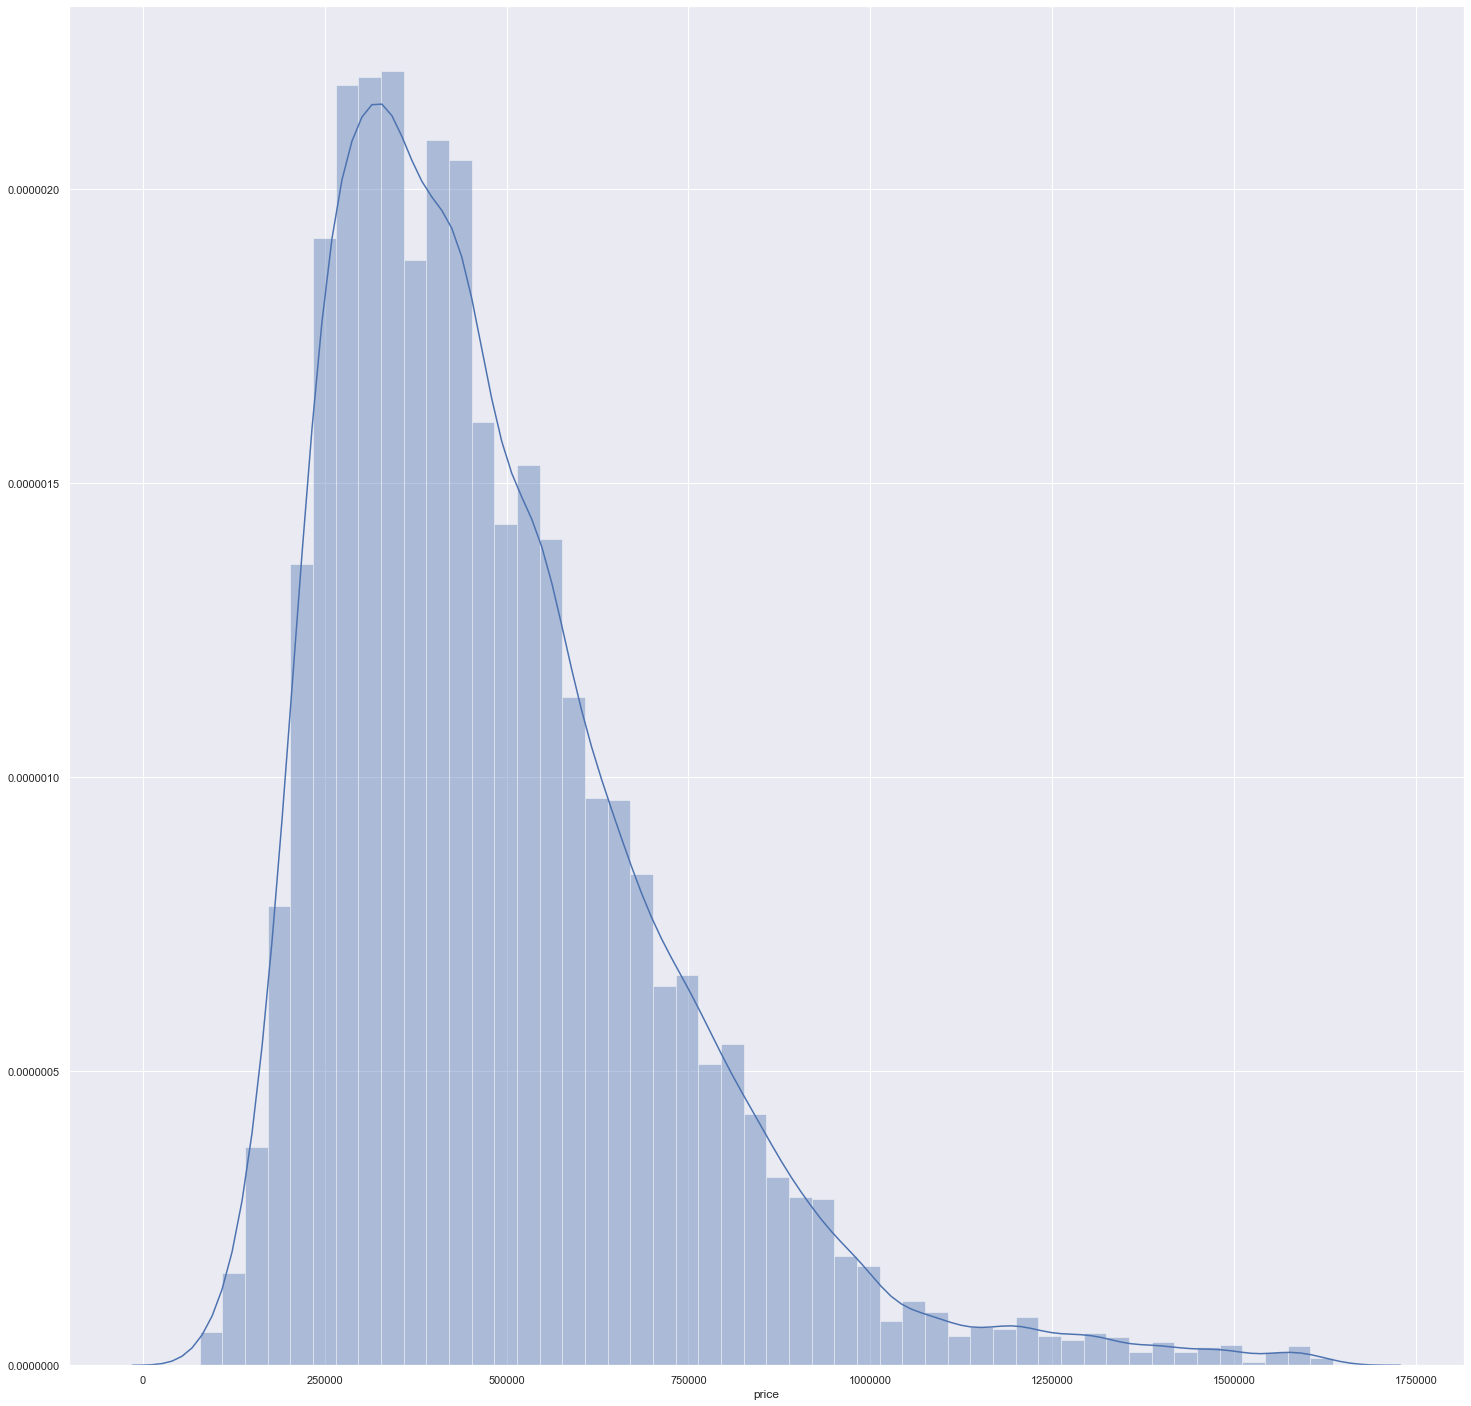

In [53]:
sns.distplot(new_df['price'])

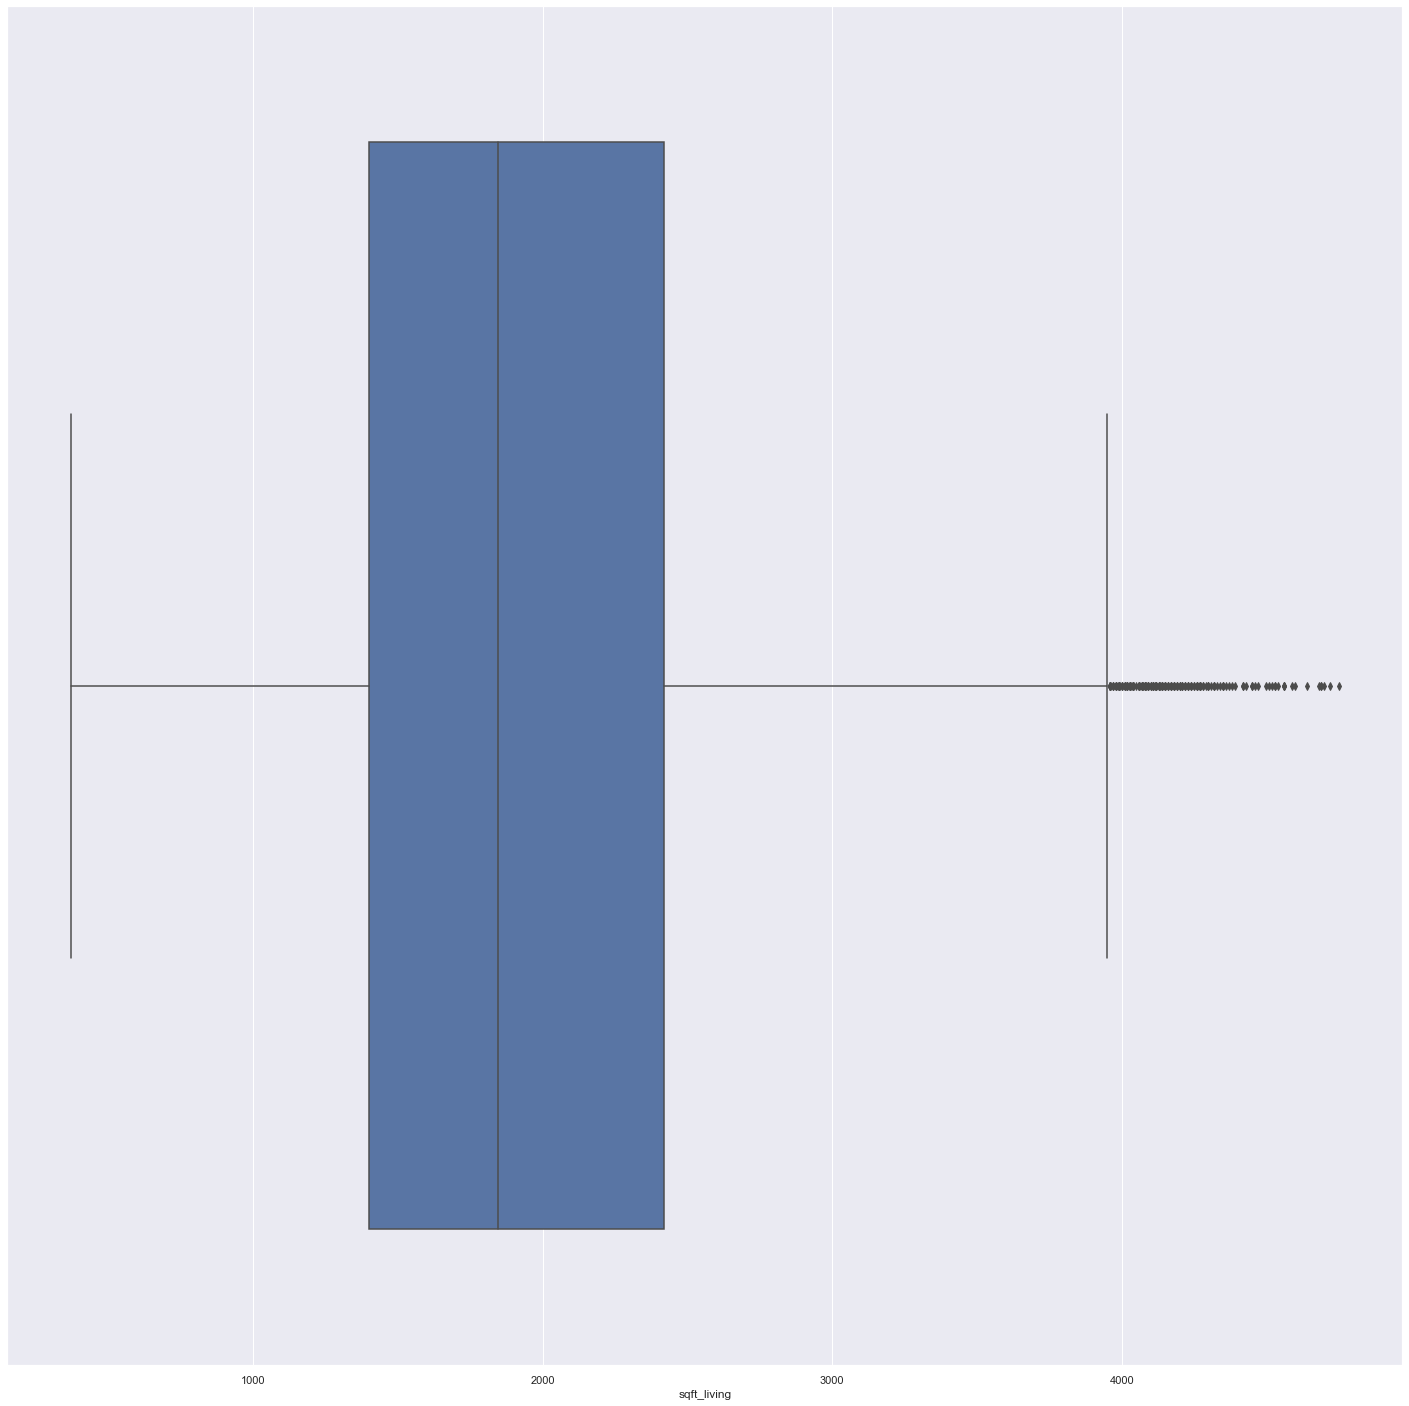

In [54]:
sns.boxplot(new_df['sqft_living'])

In [55]:
new_df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,lat,sqft_living15
count,1.997200e+04,19972.000000,19972.000000,19972.000000,19972.000000,19972.000000,19972.000000,19972.000000,19972.000000,19972.000000,19972.000000
mean,4.837457e+05,3.314590,1.671740,1954.320899,1.430903,0.096936,7.530443,1699.599840,254.721059,47.558935,1908.485630
std,2.326043e+05,0.847149,0.631407,738.581205,0.549473,0.412144,1.026037,707.908419,387.760297,0.140239,596.393316
min,7.800000e+04,1.000000,0.000000,370.000000,1.000000,0.000000,5.000000,370.000000,0.000000,47.155900,460.000000
25%,3.149500e+05,3.000000,1.000000,1400.000000,1.000000,0.000000,7.000000,1170.000000,0.000000,47.464475,1460.000000
50%,4.350000e+05,3.000000,2.000000,1847.000000,1.000000,0.000000,7.000000,1510.000000,0.000000,47.569850,1790.000000
75%,6.000000e+05,4.000000,2.000000,2420.000000,2.000000,0.000000,8.000000,2100.000000,500.000000,47.680025,2260.000000
max,1.636000e+06,6.000000,3.000000,4750.000000,3.000000,2.000000,11.000000,4270.000000,1610.000000,47.777600,4040.000000


In [56]:
new_df.shape

(19972, 11)

In [57]:
new_df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
view             0
grade            0
sqft_above       0
sqft_basement    0
lat              0
sqft_living15    0
dtype: int64

In [58]:
new_df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1,1180.0,1,0,7,1180.0,0.0,47.5112,1340.0
1,538000.0,3,2,2570.0,2,0,7,2170.0,400.0,47.7210,1690.0
2,180000.0,2,1,770.0,1,0,6,770.0,0.0,47.7379,2720.0
3,604000.0,4,3,1960.0,1,0,7,1050.0,910.0,47.5208,1360.0
4,510000.0,3,2,1680.0,1,0,8,1680.0,0.0,47.6168,1800.0


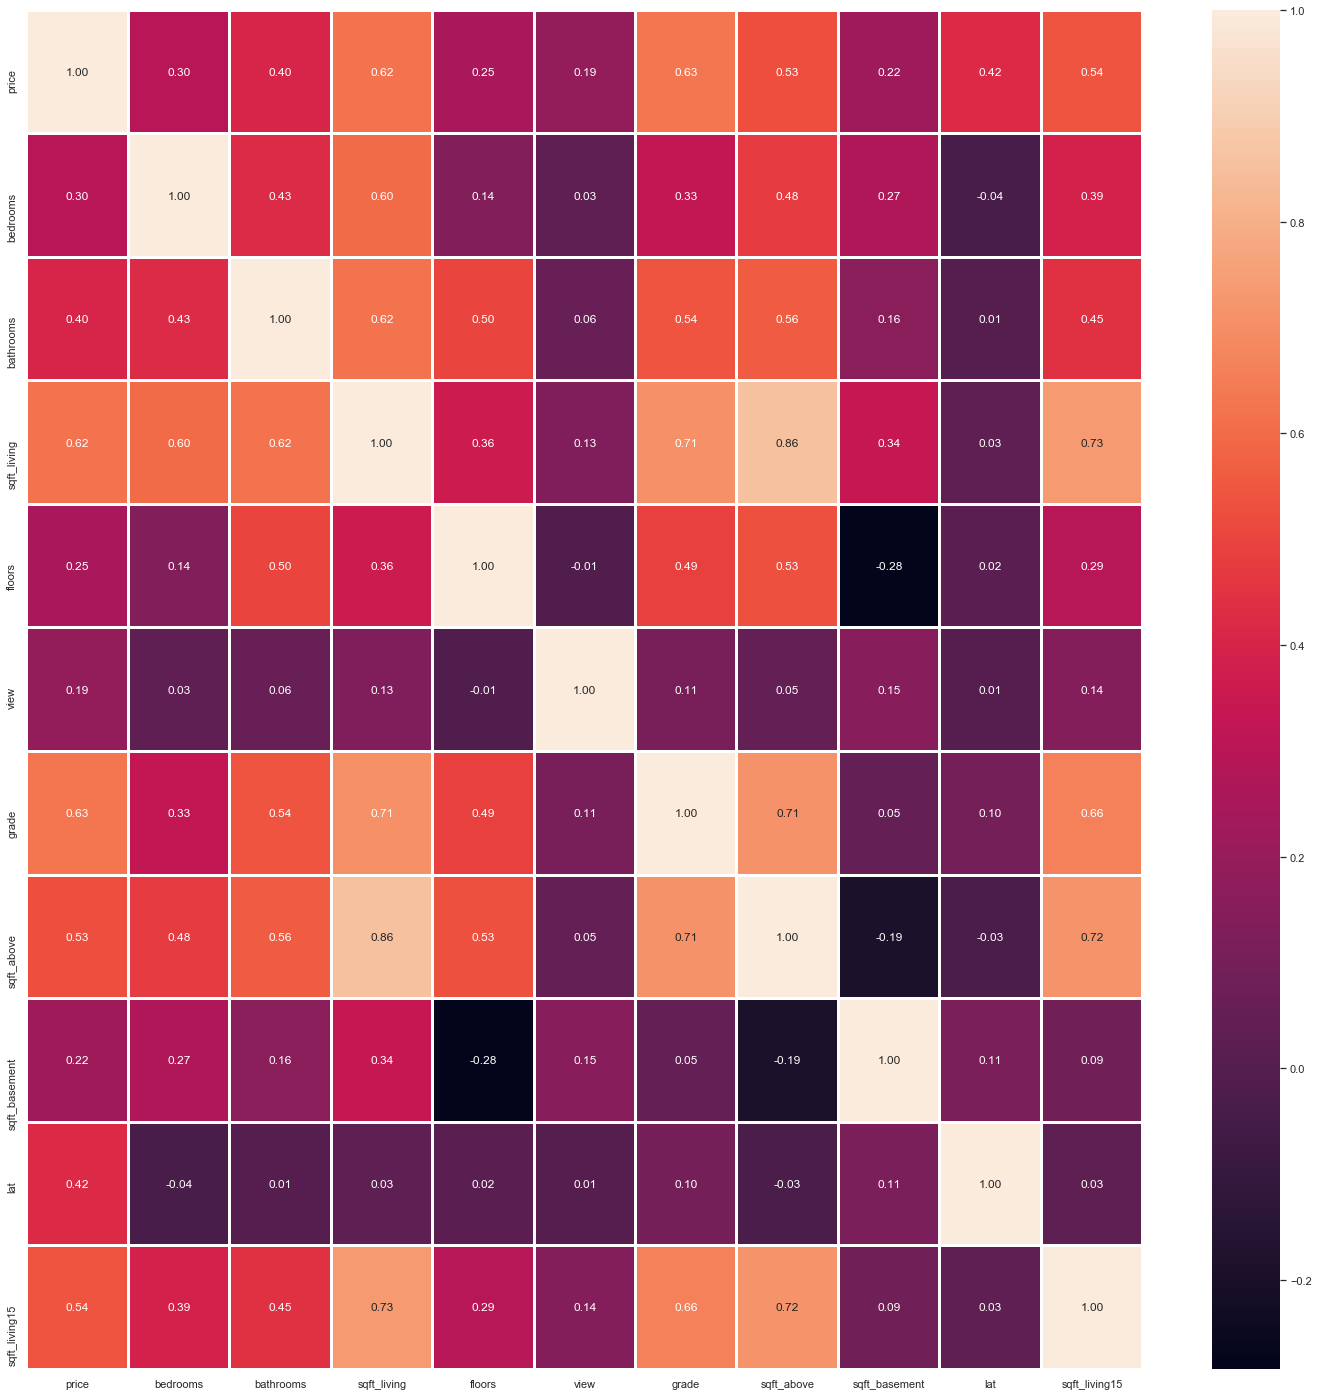

In [59]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(new_df.corr(),annot=True,fmt='.2f',linewidths=2)

# Model Development

In [62]:
from sklearn.model_selection import train_test_split
x=new_df.iloc[:,1:].values
y=new_df['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Multivariate linear regression


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [64]:
lr=LinearRegression()
scores=cross_val_score(estimator=lr,X=x_train,y=y_train,cv=10,n_jobs=1)
print('CV accuracy scores: %s'% scores)
print('CV accuracy:%.3f +/- %.3f'%(np.mean(scores),np.std(scores)))


CV accuracy scores: [0.61265124 0.58884225 0.63844644 0.60396348 0.61469622 0.63190016
 0.61570923 0.61632097 0.63192689 0.59168133]
CV accuracy:0.615 +/- 0.016


In [65]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

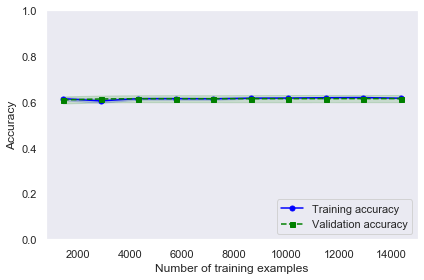

In [66]:
%matplotlib inline
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=lr,
                               X=x_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0, 1])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

## Ridge regression

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [68]:
model = Ridge(normalize=True)
parameters = {'alpha':[1,10,0.1]}

In [69]:
gs=GridSearchCV(estimator=model,param_grid=parameters,scoring='r2',cv=2)
scores=cross_val_score(gs,x_train,y_train,scoring='r2',cv=5)
print('CV accuracy scores: %s'% scores)
print('CV accuracy:%.3f +/- %.3f'%(np.mean(scores),np.std(scores)))

CV accuracy scores: [0.59925783 0.61963864 0.62240505 0.61396961 0.60873567]
CV accuracy:0.613 +/- 0.008


In [70]:
gs=gs.fit(x_train,y_train)

In [71]:
gs.best_params_

{'alpha': 0.1}

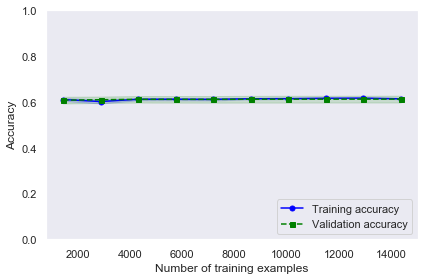

In [72]:
%matplotlib inline
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=gs,
                               X=x_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0, 1])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

## Polynomial Regression

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [75]:
pipe=make_pipeline(StandardScaler(),PolynomialFeatures(degree=3),LinearRegression())

In [76]:
scores=cross_val_score(estimator=pipe,X=x_train,y=y_train,cv=10,n_jobs=1)
print('CV accuracy scores: %s'% scores)
print('CV accuracy:%.3f +/- %.3f'%(np.mean(scores),np.std(scores)))

CV accuracy scores: [0.74438511 0.707189   0.75191263 0.72362814 0.74339685 0.75770896
 0.73799267 0.75543569 0.75933099 0.72997131]
CV accuracy:0.741 +/- 0.016


In [77]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

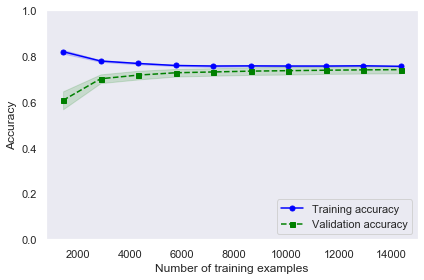

In [78]:
%matplotlib inline
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe,
                               X=x_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0, 1])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

## Random forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
forest=RandomForestRegressor(n_estimators=200,criterion='mse',random_state=1)

In [82]:
scores=cross_val_score(estimator=forest,X=x_train,y=y_train,cv=10,n_jobs=1)
print('CV accuracy scores: %s'% scores)
print('CV accuracy:%.3f +/- %.3f'%(np.mean(scores),np.std(scores)))

CV accuracy scores: [0.78133925 0.74358542 0.79038981 0.76236684 0.78796259 0.77897077
 0.77681649 0.78756951 0.79191044 0.76447537]
CV accuracy:0.777 +/- 0.015


In [83]:
forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

#### From the four models Random forest regressor is the best


### Test The final model on the test set

In [85]:
forest.score(x_test,y_test)

0.7703959696667689

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
y_predict=forest.predict(x_test)

In [88]:
print('MSE test: %.3f',mean_squared_error(y_test,y_predict))


MSE test: %.3f 12374702128.668669


# Saving model

In [89]:
import joblib

In [97]:
filename = 'finalized_model.sav'
joblib.dump(forest, filenamae)

['finalized_model.sav']

In [98]:
filename = 'finalized_model_regression.sav'
joblib.dump(lr, filename)

['finalized_model_regression.sav']

In [99]:
filename = 'finalized_model_ridge.sav'
joblib.dump(gs, filename)

['finalized_model_ridge.sav']

In [101]:
filename = 'finalized_model_polynomial.sav'
joblib.dump(pipe, filename)

['finalized_model_polynomial.sav']